## A first example running SMURFF

In this notebook we will run the BPMF algorithm using SMURFF, 
on compound-activity data.

### Downloading the data files

In these examples we use ChEMBL dataset for compound-proteins activities (IC50). The IC50 values and ECFP fingerprints can be downloaded using this smurff function:

In [1]:
import logging
logging.basicConfig(level = logging.INFO)

import smurff

ic50_train, ic50_test, ecfp = smurff.load_chembl()

The resulting variables are all `scipy.sparse` matrices: `ic50` is
a sparse matrix containing interactions between chemical compounds (in the rows)
and protein targets (called essays - in the columns). The matrix is already split in 
as train and test set.

The `ecfp` contains compound features. These features will not be used in this example.

### Having a look at the data

The `spy` function in `matplotlib` is a handy function to plot sparsity pattern of a matrix.

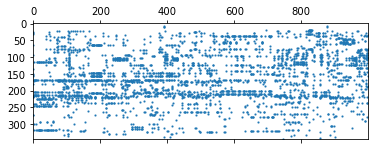

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt 

fig = plt.figure()
ax = fig.add_subplot(111)
ax.spy(ic50_train.tocsr()[0:1000,:].T, markersize = 1)


### Running SMURFF

Finally we run make a BPMF training trainSession and call `run`. The `run` function builds the model and
returns the `predictions` of the test data.

In [ ]:
trainSession = smurff.BPMFSession(
                       Ytrain     = ic50_train,
                       Ytest      = ic50_test,
                       num_latent = 16,
                       burnin     = 40,
                       nsamples   = 200,
                       verbose    = 1,
                       checkpoint_freq = 1,
                       save_freq = 1,)

predictions = trainSession.run()

We can use the `calc_rmse` function to calculate the RMSE.

In [ ]:
rmse = smurff.calc_rmse(predictions)
rmse

### Plotting predictions versus actual values
Next to RMSE, we can also plot the predicted versus the actual values, to see how well the model performs.

In [ ]:
import numpy
from matplotlib.pyplot import subplots, show

y = numpy.array([ p.val for p in predictions ])
predicted = numpy.array([ p.pred_avg for p in predictions ])

fig, ax = subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
show()